In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Génération des données
np.random.seed(42)  # Pour la reproductibilité
n_points = 100
x = np.linspace(0, 100, n_points)  # Dépenses publicitaires
y = 50 + 2 * x + 10 * np.sin(x / 5) + np.random.normal(0, 10, n_points)  # Ventes avec variation sinus

# Création du DataFrame
sales = pd.DataFrame({'Dépenses_publicitaires': x, 'Ventes': y})

In [3]:
sales.head()

,Dépenses_publicitaires,Ventes
0,0.000000,54.967142
1,1.010101,52.644048
2,2.020202,64.448656
3,3.030303,76.987246
4,4.040404,62.968900


In [5]:
# y = ax+b, x est indépendant et y dépend de x, modèle predictif c'est une droite 
# h , y df = pd.DataFrame( { 'heures_cours_pandas' : h , nombre_de_cheveux' : y } )  y = ah + b 

In [8]:
import statsmodels.api as sm

# Variables dépendante (Y) et indépendante (X)
X = sales['Dépenses_publicitaires']  # Variable indépendante
y = sales['Ventes']                   # Variable dépendante

# Ajout d'une constante à X pour le terme d'interception - obligatoire pour construire le modèle Y = AX + B 
X = sm.add_constant(X)

# Création du modèle de régression linéaire
model = sm.OLS(y, X)

# Ajustement du modèle aux données
results = model.fit()

# Afficher les résultats de la régression
print(results.summary())

# Obtenir les paramètres de la régression
intercept = results.params['const']
slope = results.params['Dépenses_publicitaires']

print(f"Interception (constante): {intercept}")
print(f"Coefficient de la variable indépendante (slope): {slope}")

# Construire l'équation de la droite
equation = f"Y = {slope:.2f}X + {intercept:.2f}"
print(f"Équation de la droite de régression: {equation}")

                            OLS Regression Results                            
Dep. Variable:                 Ventes   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     2428.
Date:                Wed, 10 Jul 2024   Prob (F-statistic):           5.84e-71
Time:                        11:52:15   Log-Likelihood:                -386.90
No. Observations:                 100   AIC:                             777.8
Df Residuals:                      98   BIC:                             783.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     50

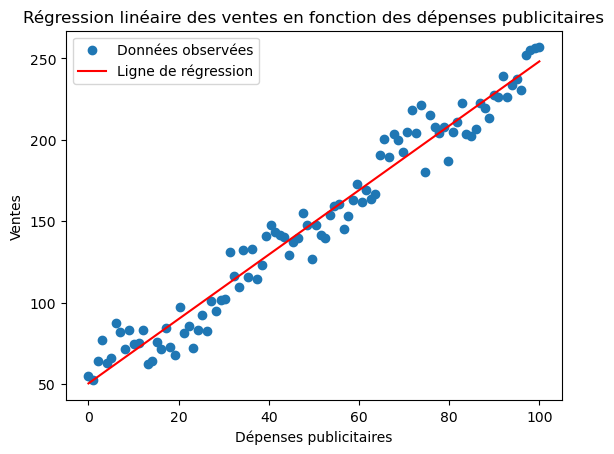

In [7]:
plt.scatter(sales['Dépenses_publicitaires'], sales['Ventes'], label='Données observées')
plt.plot(sales['Dépenses_publicitaires'], results.fittedvalues, color='red', label='Ligne de régression')
plt.xlabel('Dépenses publicitaires')
plt.ylabel('Ventes')
plt.title('Régression linéaire des ventes en fonction des dépenses publicitaires')
plt.legend()
plt.show()

In [9]:
p_values = results.pvalues
print("P-values des coefficients :")
print(p_values)

P-values des coefficients :
const                     3.548822e-39
Dépenses_publicitaires    5.839428e-71
dtype: float64


In [10]:
# Obtenir les intervalles de confiance pour les coefficients
confidence_intervals = results.conf_int()
print("Intervalles de confiance pour les coefficients:")
print(confidence_intervals)

Intervalles de confiance pour les coefficients:
                                0          1
const                   45.772845  54.996296
Dépenses_publicitaires   1.898616   2.057969


In [11]:
# Extraire les intervalles de confiance pour chaque coefficient
ci_intercept = confidence_intervals.loc['const']
ci_slope = confidence_intervals.loc['Dépenses_publicitaires']

print(f"Intervalle de confiance pour l'interception (constante): [{ci_intercept[0]:.2f}, {ci_intercept[1]:.2f}]")
print(f"Intervalle de confiance pour le coefficient de la variable indépendante (slope): [{ci_slope[0]:.2f}, {ci_slope[1]:.2f}]")

Intervalle de confiance pour l'interception (constante): [45.77, 55.00]
Intervalle de confiance pour le coefficient de la variable indépendante (slope): [1.90, 2.06]
